# House Price Prediction - Advanced Regression Techniques
Dataset Link - https://www.kaggle.com/c/house-prices-advanced-regression-techniques

- Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

- With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Exploratory Data Analysis

#### Importing required libraries and the training dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Reading the dataset
df = pd.read_csv('train.csv', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Exploring Missing/NaN Values

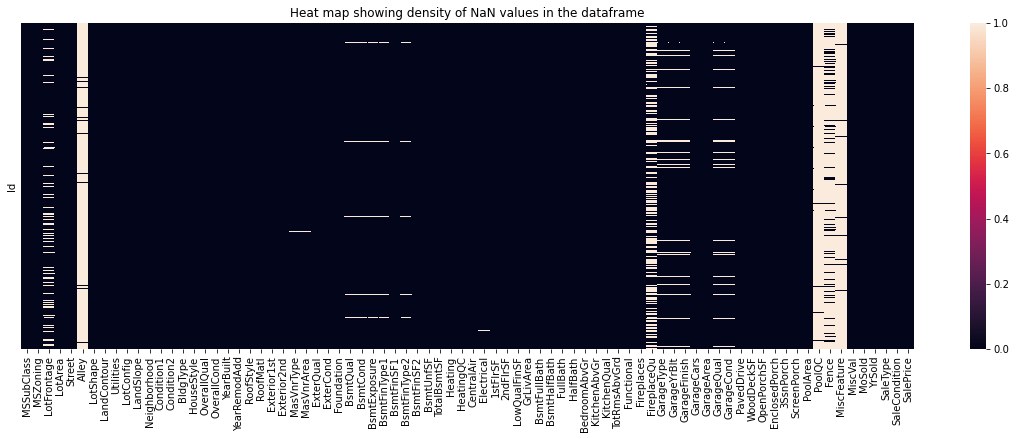

In [3]:
# Plotting a heatmap of density of NaN values present in the dataframe
plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull(), yticklabels=False)
plt.title('Heat map showing density of NaN values in the dataframe')
plt.show()

In [4]:
# Calculating percentage of NaN values (in columns with NaN values present)
features_with_nan = []

for feature in df.columns:
    if(df[feature].isnull().sum() != 0):
        features_with_nan.append(feature)
        print(feature, ':', round(df[feature].isnull().mean() * 100, 2), '%')

LotFrontage : 17.74 %
Alley : 93.77 %
MasVnrType : 0.55 %
MasVnrArea : 0.55 %
BsmtQual : 2.53 %
BsmtCond : 2.53 %
BsmtExposure : 2.6 %
BsmtFinType1 : 2.53 %
BsmtFinType2 : 2.6 %
Electrical : 0.07 %
FireplaceQu : 47.26 %
GarageType : 5.55 %
GarageYrBlt : 5.55 %
GarageFinish : 5.55 %
GarageQual : 5.55 %
GarageCond : 5.55 %
PoolQC : 99.52 %
Fence : 80.75 %
MiscFeature : 96.3 %


- Features 'Alley', 'PoolQC', 'Fence' and 'MiscFeature' have really high percentages of NaN values. Feature 'FireplaceQu' also has a lot of NaN values. Some features have very less number of NaN values while many features don't have any.

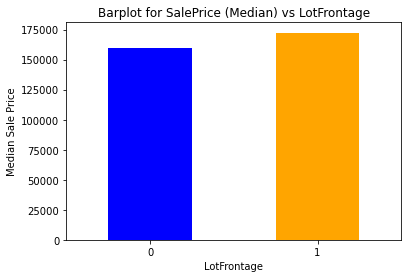

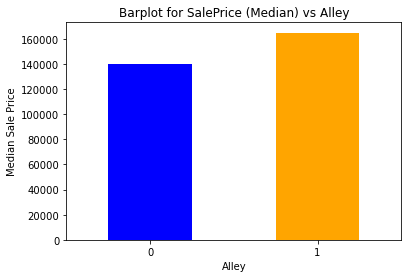

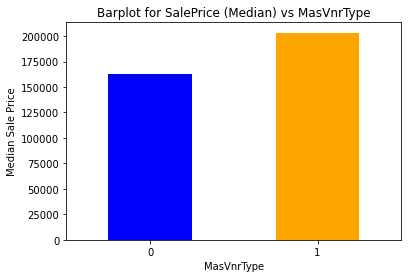

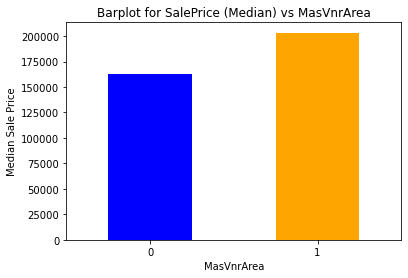

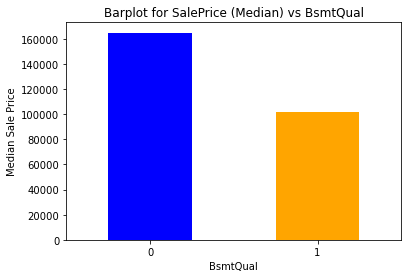

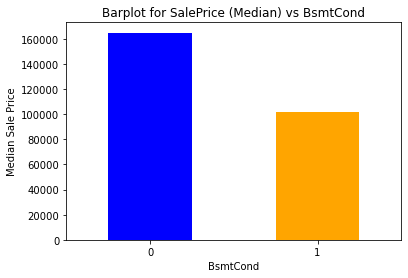

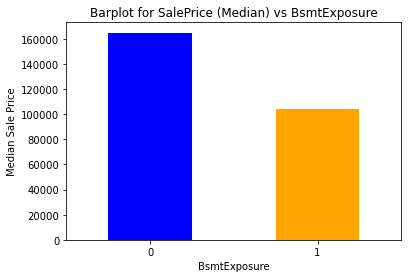

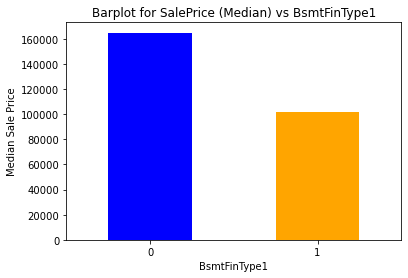

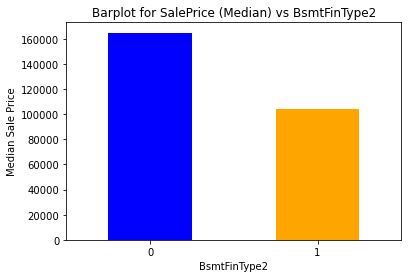

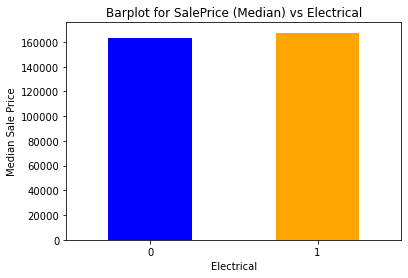

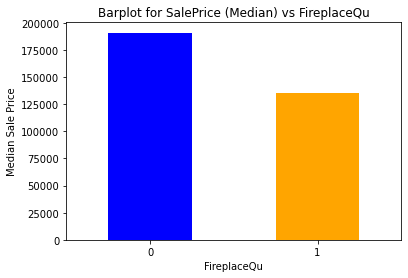

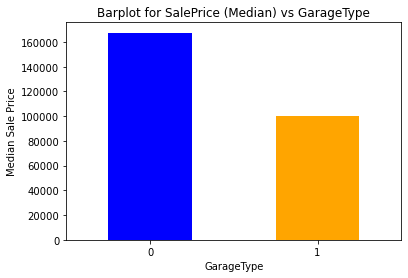

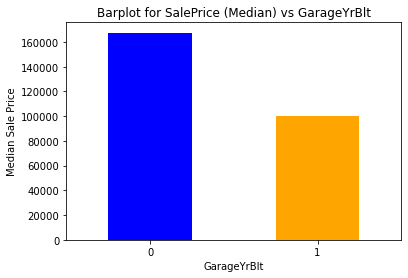

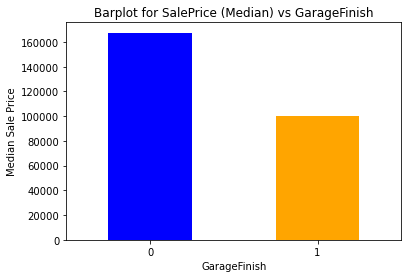

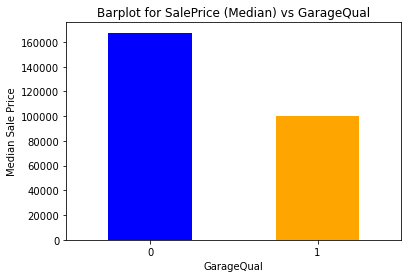

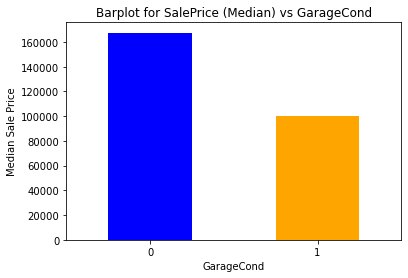

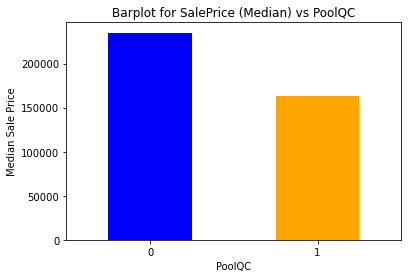

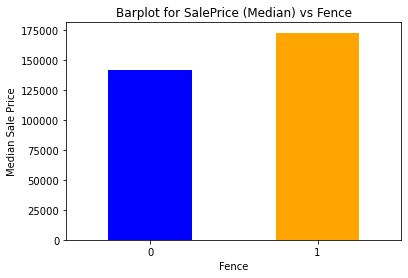

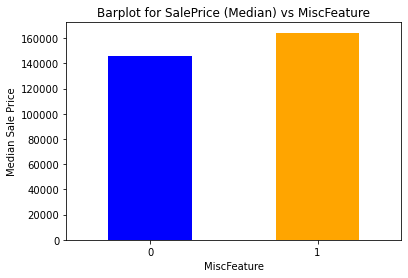

In [5]:
# Checking if features with NaN values present has some relationship with the dependent feature or not
temp_df = df.copy()

for feature in features_with_nan:
    temp_df[feature] = np.where(temp_df[feature].isnull(), 1, 0)
    
    temp_df.groupby(feature)['SalePrice'].median().plot.bar(rot=0, color=['blue', 'orange'])
    plt.title('Barplot for SalePrice (Median) vs {}'.format(feature))
    plt.ylabel('Median Sale Price')
    plt.show()

- There is clearly some relation between the input features with NaN values and the output features. Hence, just imputing NaN values with most frequent category may not be correct. We need to replace these NaN values with something meaningful.

#### Exploring Numerical Features

In [6]:
# Extracting numerical features (feature datatype != object)
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
df[numerical_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [7]:
# Extracting features with Year information (Date-Time variables)
year_features = [feature for feature in df.columns if 'Yr' in feature or 'Year' in feature]
print('Datetime type features:' ,year_features)

Datetime type features: ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


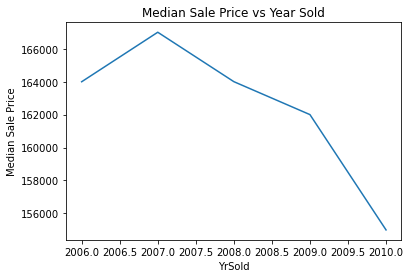

In [8]:
# Analyzing datetime features
df.groupby('YrSold')['SalePrice'].median().plot()
plt.title('Median Sale Price vs Year Sold')
plt.ylabel('Median Sale Price')
plt.show()

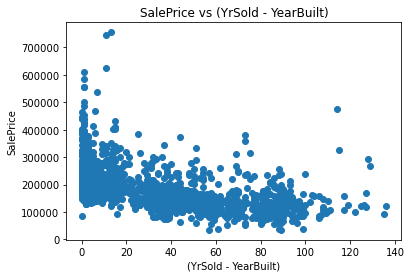

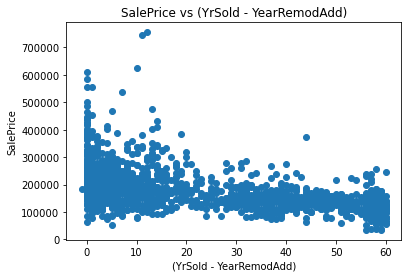

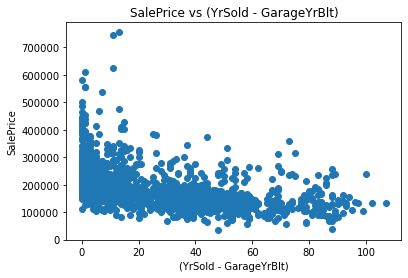

In [9]:
# Converting 'Year' features into 'Age' features by taking difference from the 'YrSold' feature and then analyzing them
temp_df = df.copy()
for feature in year_features:
    if feature != 'YrSold':
        temp_df[feature] = temp_df['YrSold'] - temp_df[feature]
        plt.scatter(temp_df[feature], temp_df['SalePrice'])
        plt.title(f'SalePrice vs (YrSold - {feature})')
        plt.xlabel(f'(YrSold - {feature})')
        plt.ylabel('SalePrice')
        plt.show()

- We can see that as the year of sale increases the median sale price tends to decrease. Also, as the age of the house increases the median selling price decreases. Similar intuition is true for the age of remoddeling addition and garage.

#### Exploring Discrete Numerical Features

In [10]:
# Extracting discrete numerical features (number of unique values < 25 and not datetime features)
discrete_numerical_features = [feature for feature in numerical_features 
                               if len(df[feature].unique()) < 25 and feature not in year_features]
print('Number of Discrete Numerical Features :', len(discrete_numerical_features), '\n')
print(discrete_numerical_features)

Number of Discrete Numerical Features : 17 

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


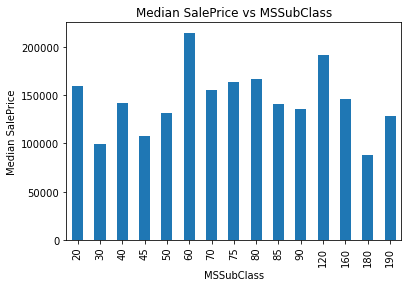

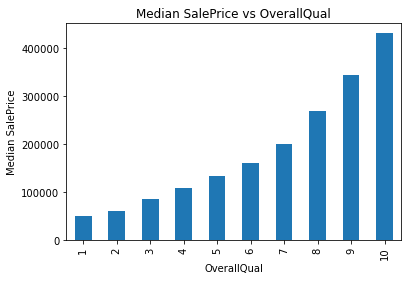

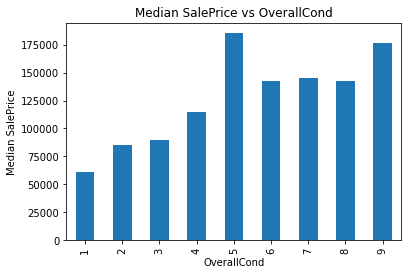

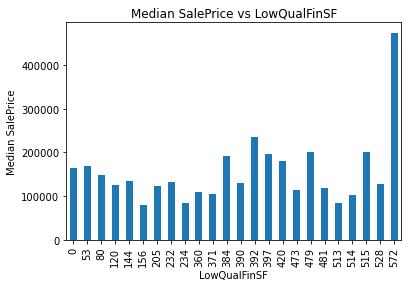

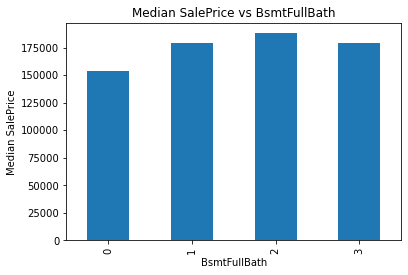

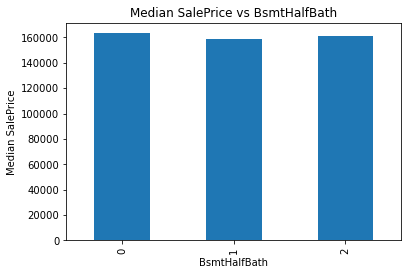

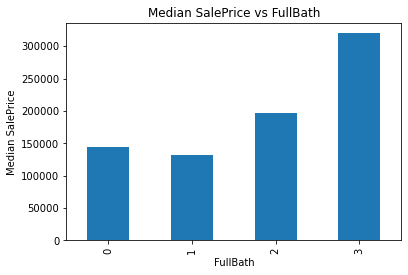

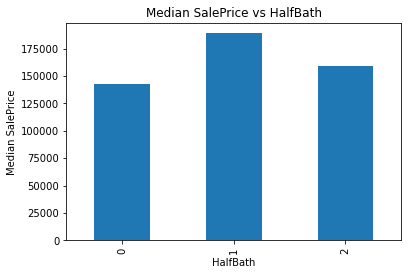

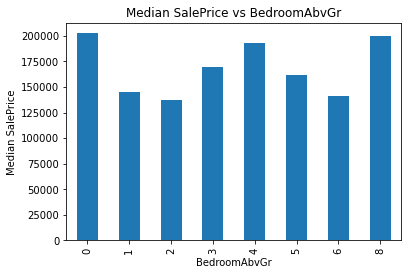

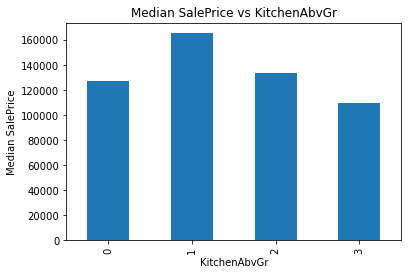

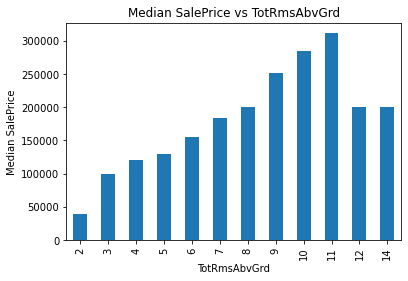

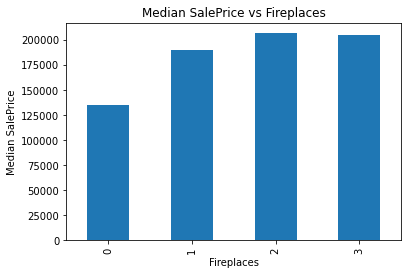

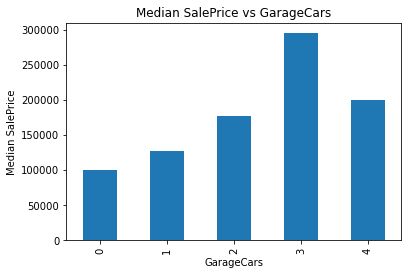

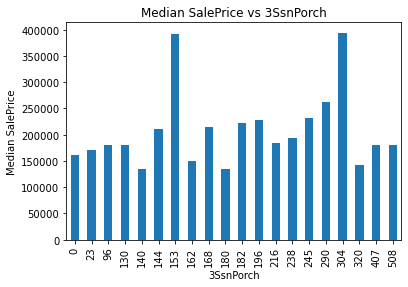

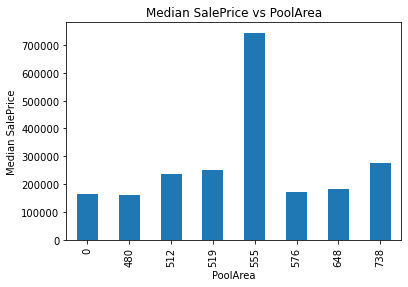

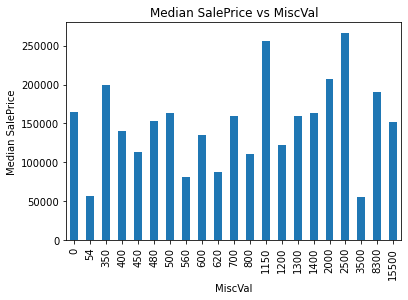

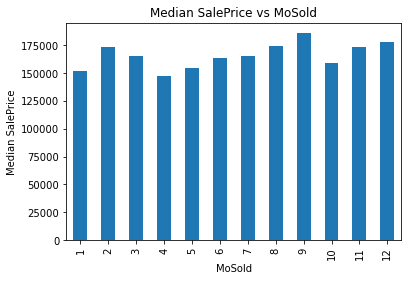

In [11]:
# Exploring relationship between discrete numerical features and output feature 'SalePrice'
for feature in discrete_numerical_features:
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title('Median SalePrice vs {}'.format(feature))
    plt.ylabel('Median SalePrice')
    plt.show()

- There are 17 discrete numerical features (excluding the datetime features) where some of them have a monotonic (or roughly monotonic) relationship with the dependent feature 'SalePrice'. Relationship or trends or insights for other features are also clearly visible for individual cases.

#### Exploring Continous Numerical Features 

In [12]:
# Extracting continous numerical features (number of unique values >= 25 and not datetime features)
continous_numerical_features = [feature for feature in numerical_features 
                               if feature not in discrete_numerical_features and feature not in year_features]
print('Number of Continous Numerical Features :', len(continous_numerical_features), '\n')
print(continous_numerical_features)

Number of Continous Numerical Features : 16 

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


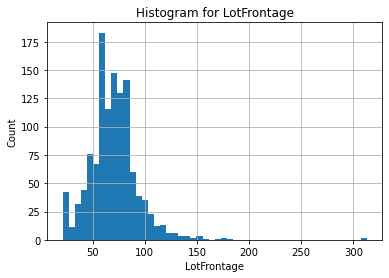

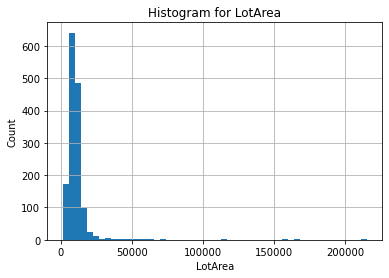

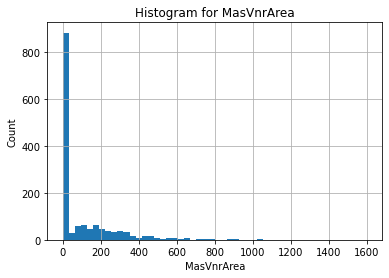

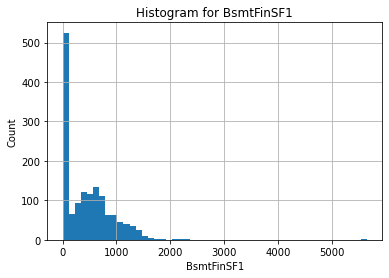

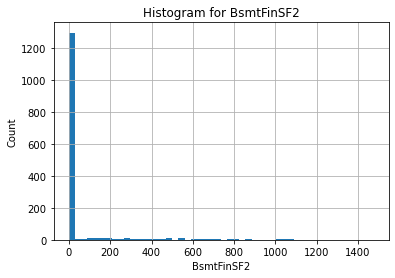

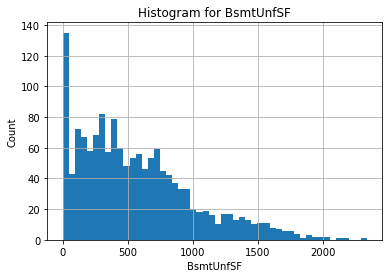

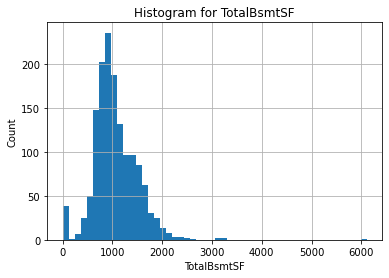

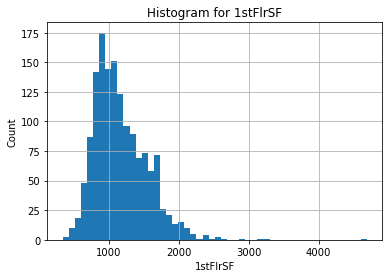

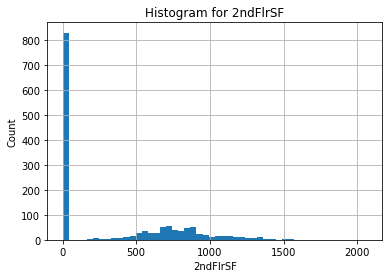

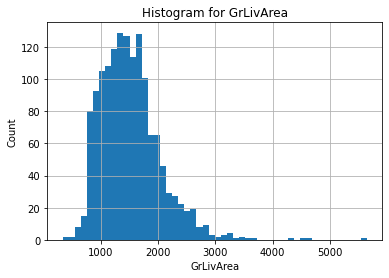

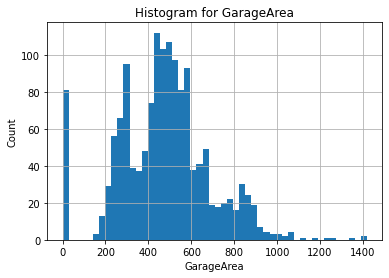

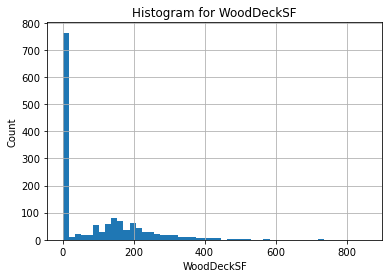

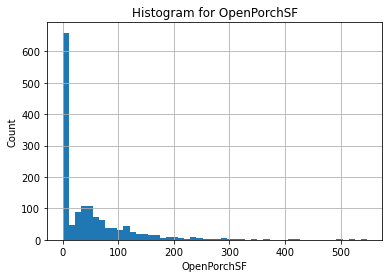

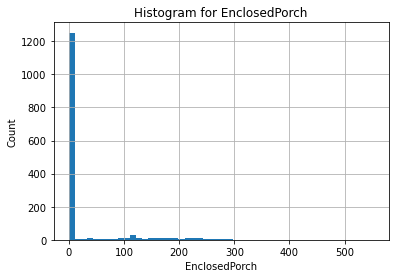

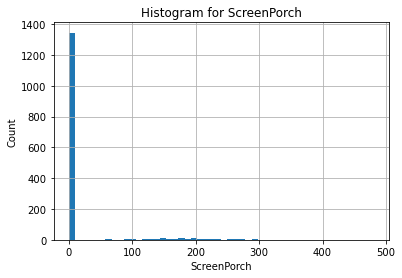

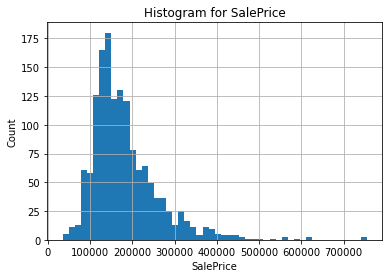

In [13]:
# Exploring relationship between continous numerical features and output feature 'SalePrice' using histograms
for feature in continous_numerical_features:
    df[feature].hist(bins=50)
    plt.title('Histogram for {}'.format(feature))
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.show()

- There are 16 continous numerical features (excluding datetime features) where some of them have a Gaussian/normal distribution while some of them don't. Some of the normally distributed features are even skewed as well.
- For a regression problem we expect the distributions to be as close to normal distributions and not skewed either. Hence, we should explore these continous numerical features with some distribution transformations applied.

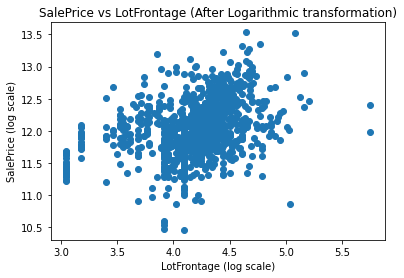

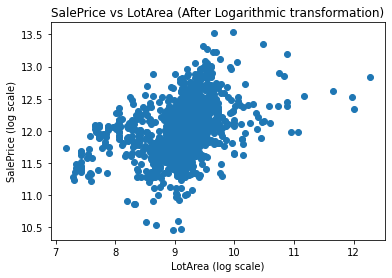

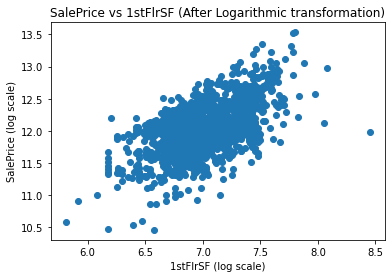

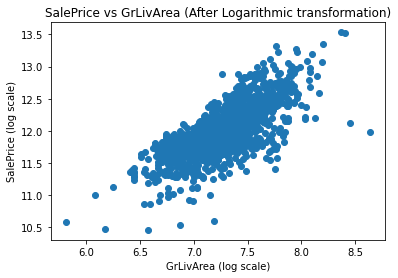

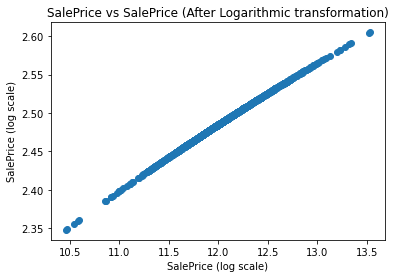

In [14]:
# Applying logarithm transformation on the continous numerical features
temp_df = df.copy()
for feature in continous_numerical_features:
    if 0 in temp_df[feature].unique():
        pass
    else:
        temp_df[feature] = np.log(temp_df[feature])
        plt.scatter(temp_df[feature], np.log(temp_df['SalePrice']))
        plt.xlabel('{} (log scale)'.format(feature))
        plt.ylabel('SalePrice (log scale)')
        plt.title('SalePrice vs {} (After Logarithmic transformation)'.format(feature))
        plt.show()

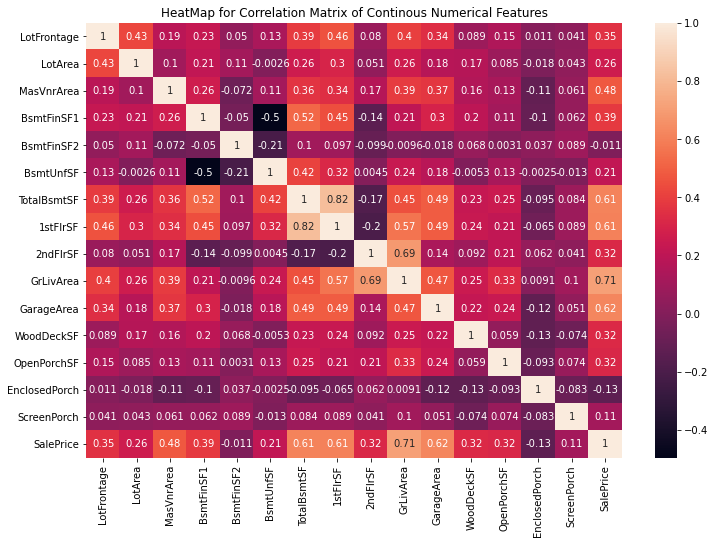

In [15]:
# Plotting heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[continous_numerical_features].corr(), annot=True)
plt.title('HeatMap for Correlation Matrix of Continous Numerical Features')
plt.show()

- We can observe that the features '1stFlrSF' and 'TotalBsmtSF' have a high Pearson correlation coefficient (0.84). Therefore, we may want to drop one of these features later on to improve model performance.
- We can see that both '1stFlrSF' and 'TotalBsmtSF' have equal Pearson correlation coefficient (0.61) w.r.t the output feature 'Saleprice'. So, we can analyze their individual plots with 'SalePrice' to determine which one to drop.

#### Exploring Outliers

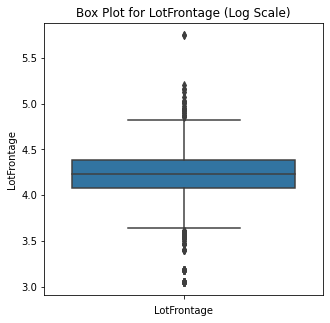

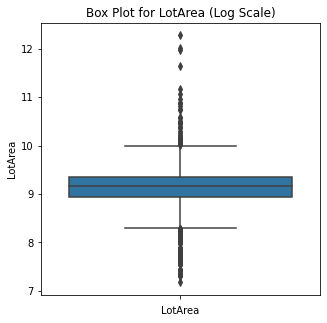

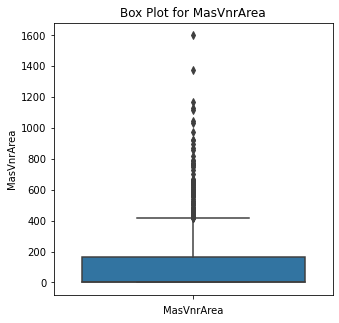

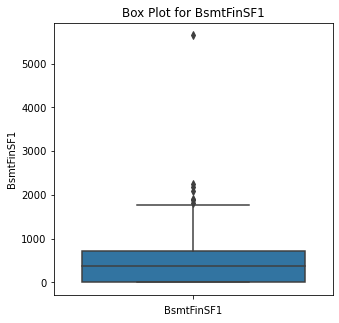

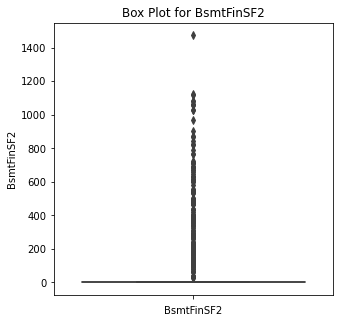

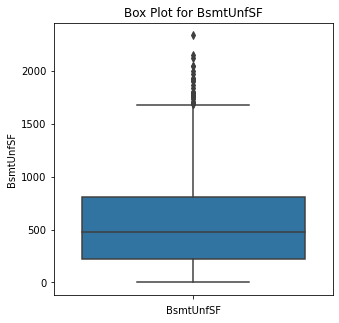

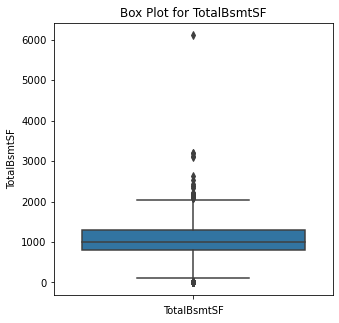

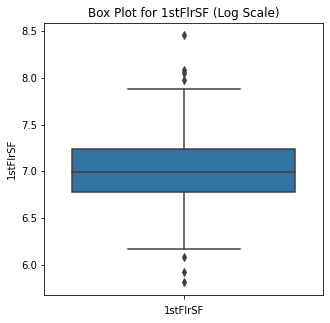

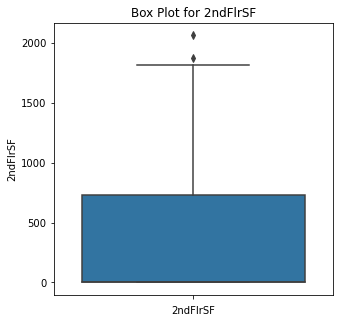

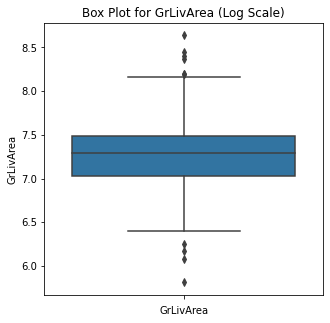

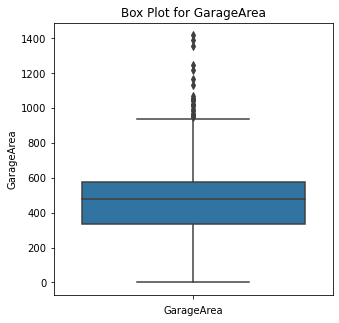

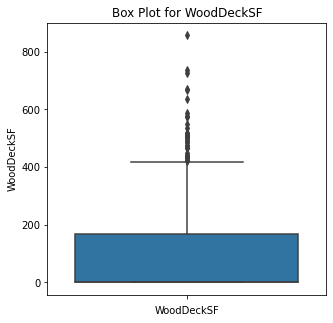

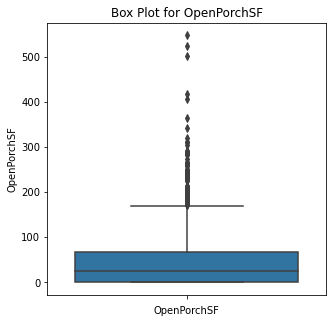

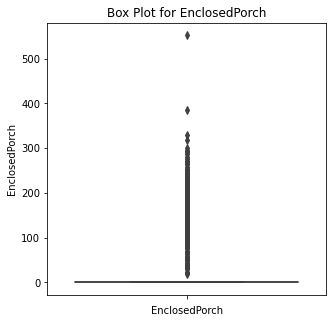

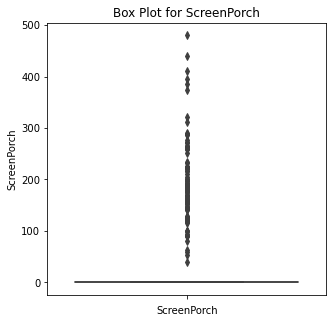

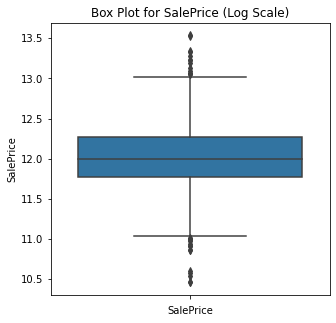

In [16]:
# Plotting boxplots for continous numerical features to find outliers
for feature in continous_numerical_features:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=temp_df[feature])
    plt.xlabel(feature)
    if 0 in temp_df[feature].unique():
        plt.title(f'Box Plot for {feature}')
    else:
        plt.title(f'Box Plot for {feature} (Log Scale)')
    plt.show()

- A lot of outliers can be observed for the continous numerical features. We will handle these outliers in the feature engineering later on.
- Note that we are trying to find outliers in the independent (or input) features only. There is no relation with the dependent (or output) feature yet. In other words, we did a univariate analysis.
- This technique of findings outliers using boxplots works only for continous features and not discrete or categorical features. For categorcial we can do a bivariate analysis where the y-axis can have the continous (output) variable and x-axis can have the (input) categorical variable. 

#### Exploring Categorical Features

In [17]:
# Extracting numerical features (feature datatype == object)
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [18]:
# Finding cardinality of categorical features (number of unique categories in the feature)
for feature in categorical_features:
    print(f'{feature} : {df[feature].nunique()}')

MSZoning : 5
Street : 2
Alley : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
FireplaceQu : 5
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
PoolQC : 3
Fence : 4
MiscFeature : 4
SaleType : 9
SaleCondition : 6


- Some of the features like 'Neighborhood', 'Exterior1st', 'Exterior2nd' and 'SaleType' have many unique categories. These features need to engineered carefully as simple one hot encoding of these features would not be a good idea. 
- Other categorical features have fairly acceptable number of unique categories and can have one hot encoding applied to them.

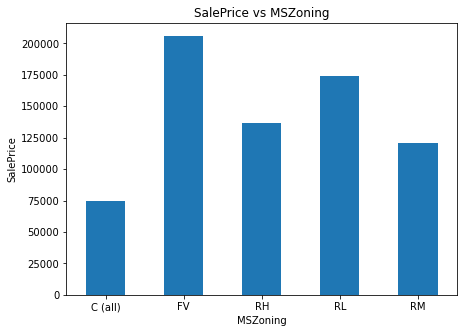

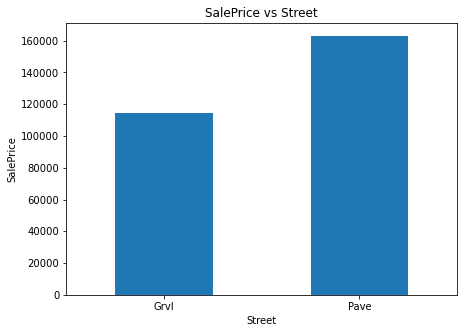

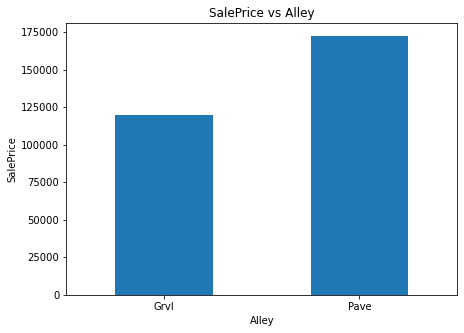

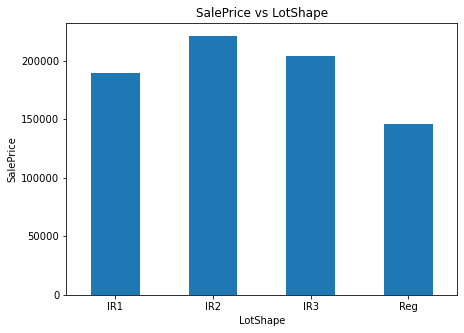

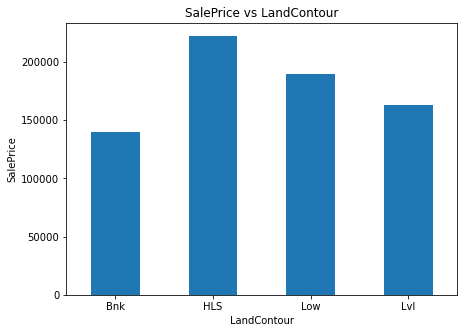

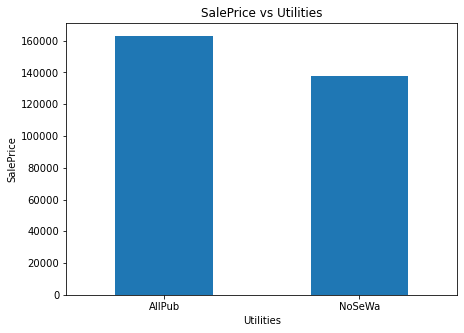

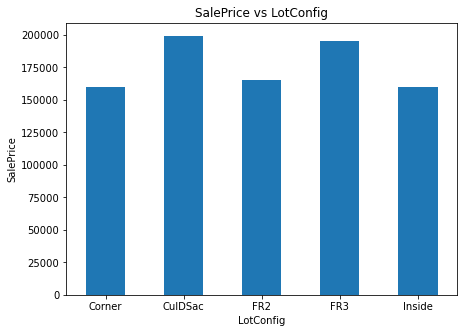

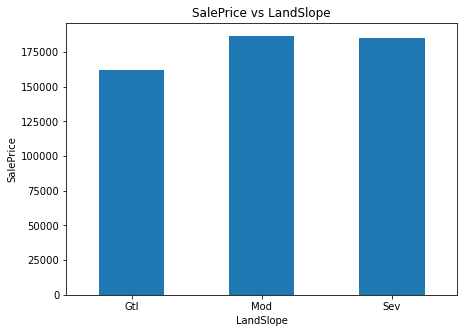

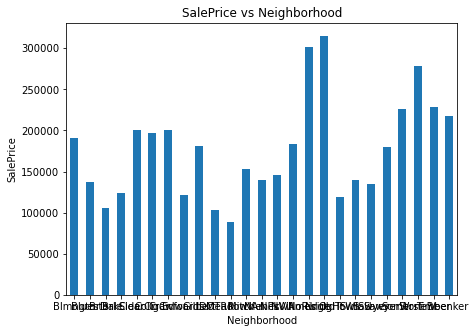

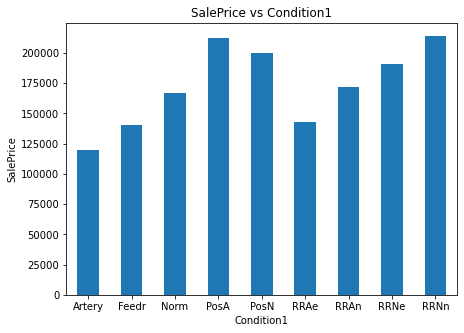

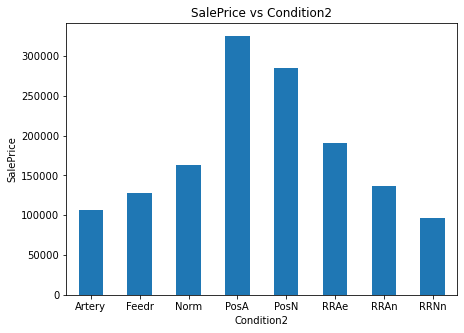

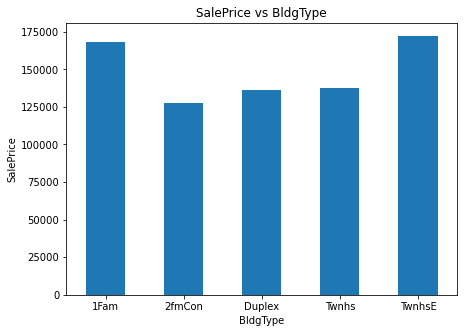

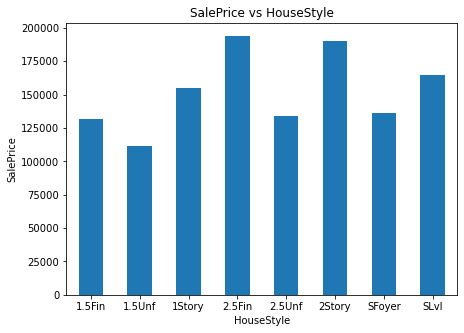

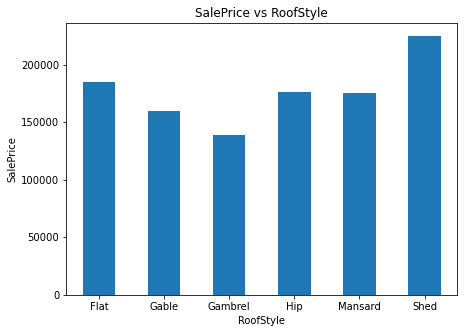

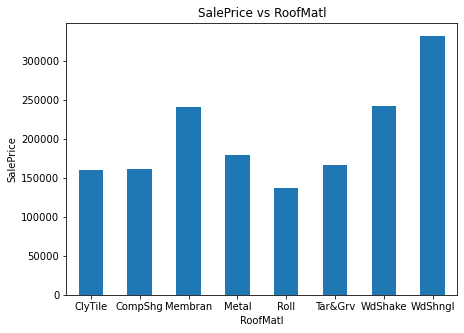

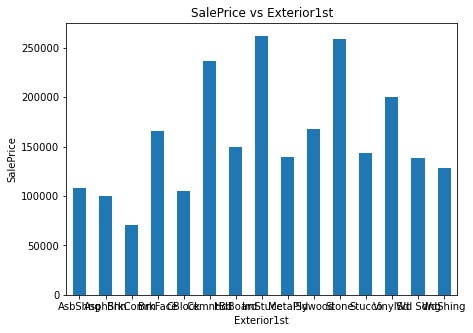

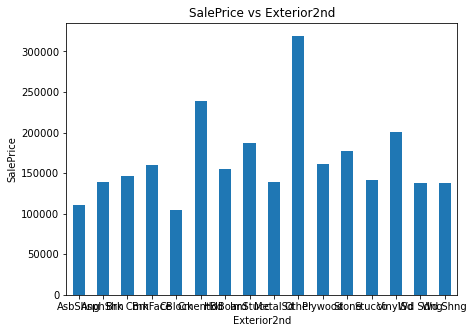

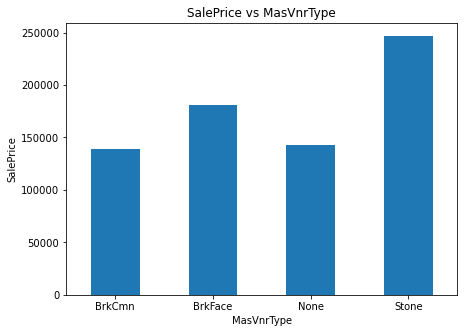

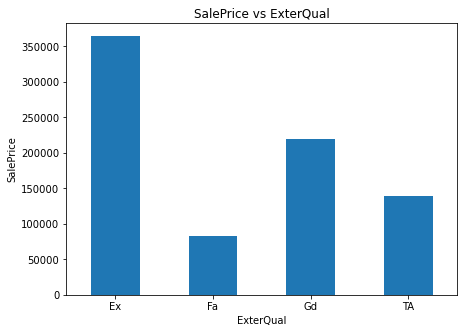

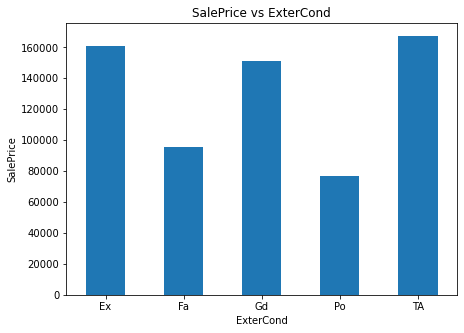

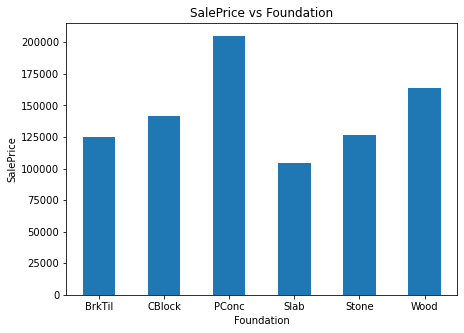

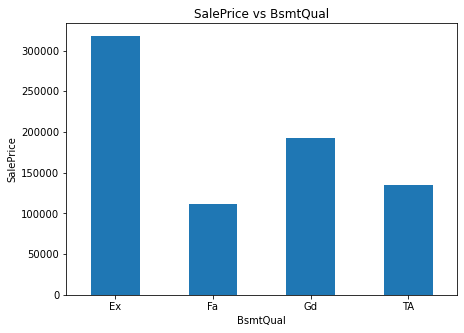

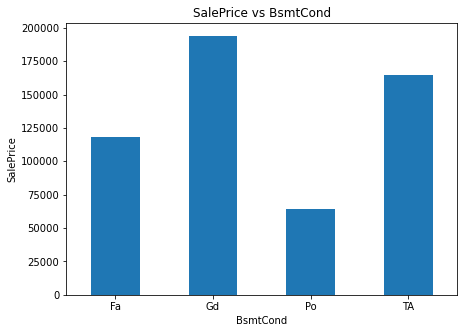

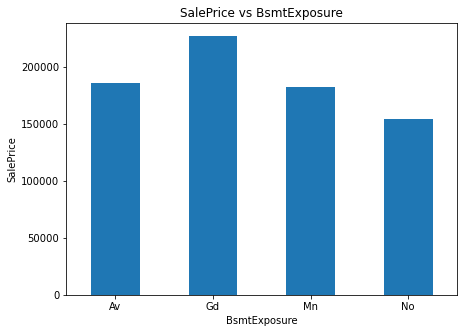

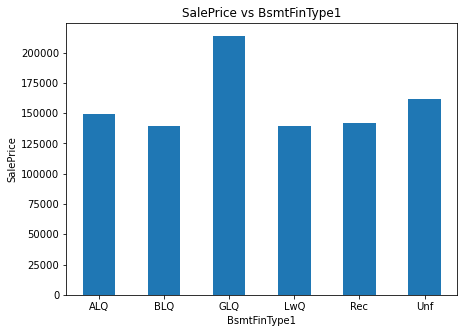

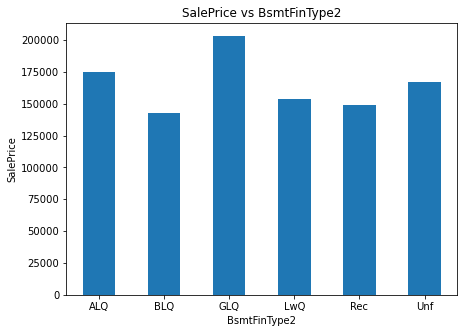

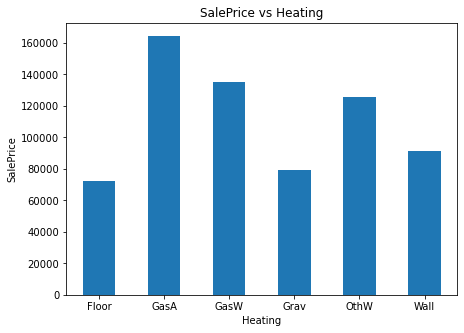

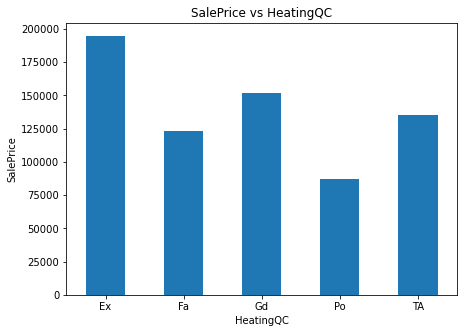

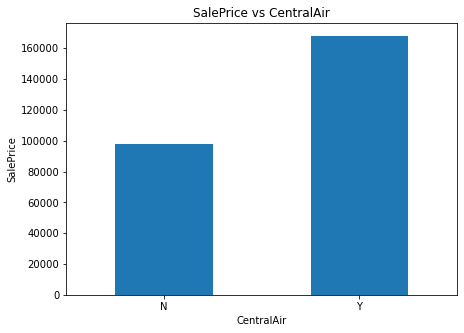

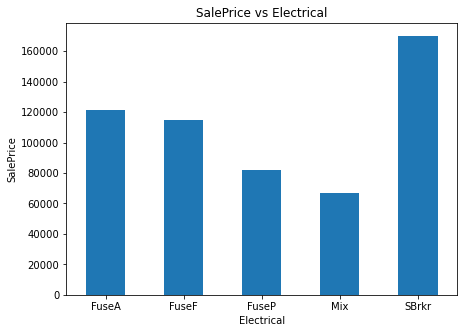

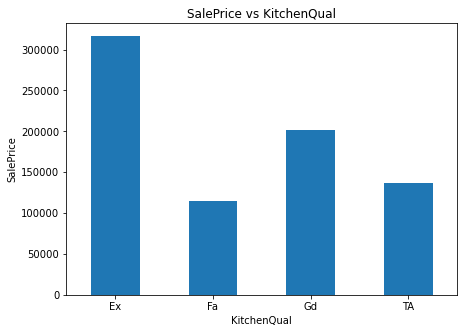

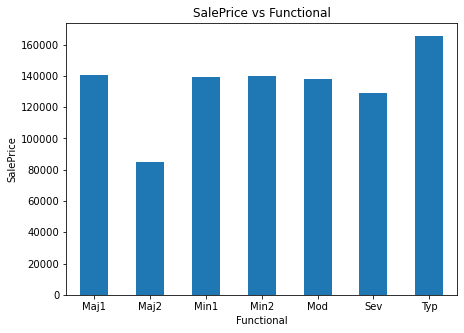

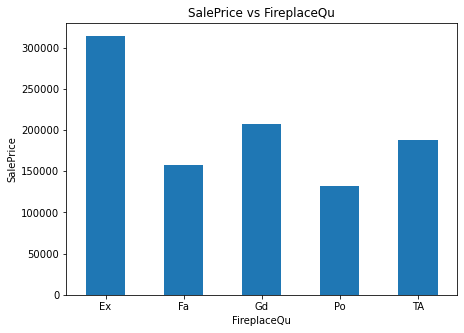

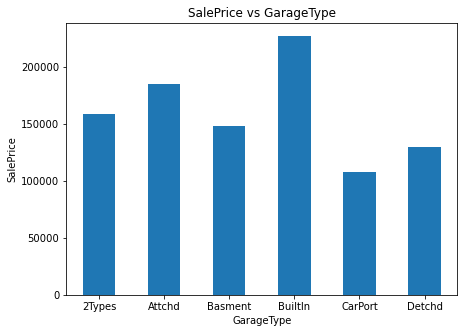

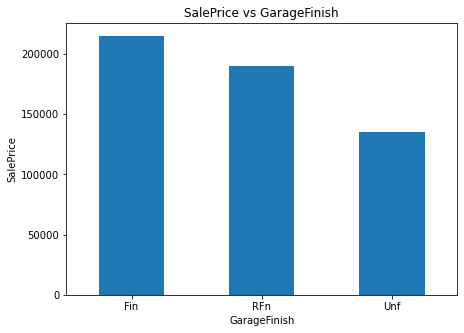

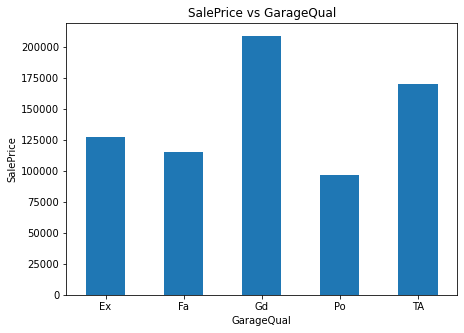

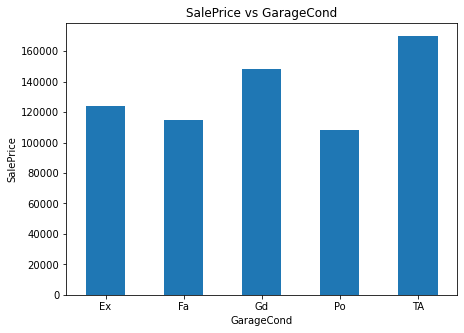

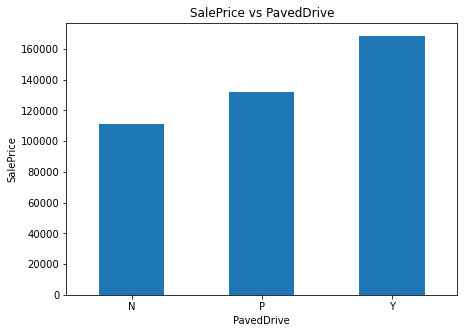

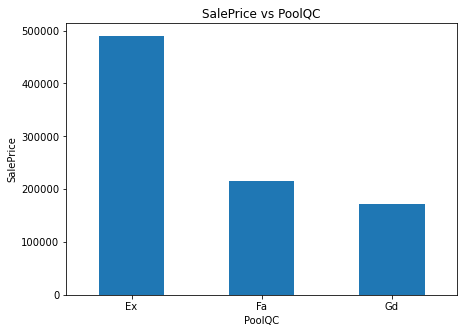

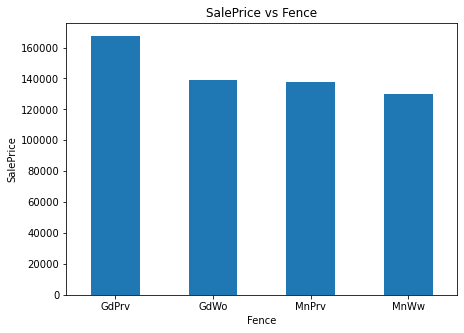

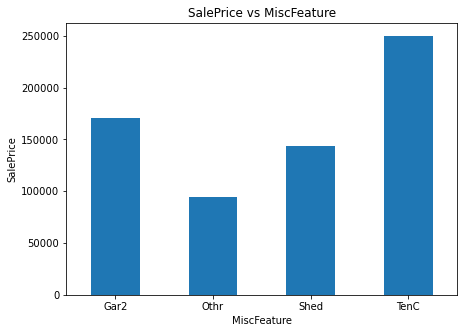

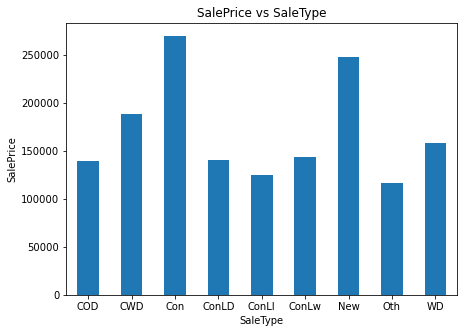

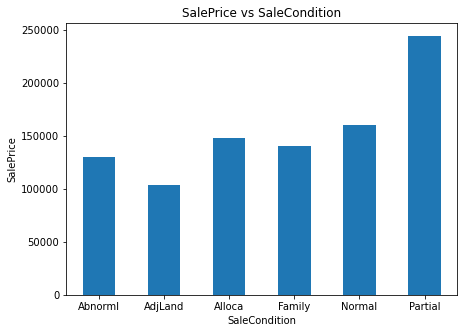

In [19]:
# Plotting barplots to find relationship between categorical features and dependent feature 'SalePrice'
for feature in categorical_features:
    plt.figure(figsize=(7, 5))
    df.groupby(feature)['SalePrice'].median().plot.bar(rot=0)
    plt.title(f'SalePrice vs {feature}')
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.show()